# Projeto de Estatística Aplicada a Telemática
### Aluno: Antonio Dartagnan Santos da Costa Junior Professor:Paulo Ribeiro Lins Junior

Análise dos dados de suicídio no Mundo, dados retirados da fonte:https://www.kaggle.com/szamil/who-suicide-statistics O principal objetivo dessa análise de dados é responder três questões: Homens ou Mulheres se suicidam mais?; Proporção de suicídios no mundo por ano e idade; Proporção de suicídios no Brasil por ano e idade.

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [164]:
df_suicidios = pd.read_csv("/home/dell/Documentos/Estatistica Aplicada a Telematica/Projeto P2/who_suicide_statistics.csv")

In [165]:
df_suicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [166]:
df_suicidios.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [167]:
codigo_idades = {'5-14 anos' :0,
                '15-24 anos' :1,
                '25-34 anos' :2,
                '55-74 anos' :3,
                '75 ou mais anos' :4}
codigo_genero = {'feminino' :0,
                'masculino' :1}

In [168]:
dados_faltando = pd.DataFrame([],columns=['Faltam','Faltam %'])
dados_faltando['Faltam'] = (df_suicidios.isna().sum())
dados_faltando['Faltam %'] = (df_suicidios.isna().sum()/df_suicidios.shape[0])
dados_faltando

,Faltam,Faltam %
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,2256,0.051535
population,5460,0.124726


Aproximadamente 5% dos dados de suicides_no faltando e 12,5% dos dados de population.

In [169]:
dados_suicidio_nan = df_suicidios.suicides_no.isnull().groupby([df_suicidios['country']]).sum().astype(int).reset_index(name='count')
dados_populacao_nan = df_suicidios.population.isnull().groupby([df_suicidios['country']]).sum().astype(int).reset_index(name='count')
dados_faltando_por_pais = pd.DataFrame(df_suicidios.groupby(df_suicidios['country'])['suicides_no'].count())
dados_faltando_por_pais = dados_faltando_por_pais.reset_index()
#dados_faltando_por_pais numero de suicidios faltando

proporcao = pd.DataFrame([], columns= ['pais', '% suicidios faltando', '% populacao faltando'])
proporcao['% suicidios faltando'] = dados_suicidio_nan['count']/dados_faltando_por_pais['suicides_no']
proporcao['% populacao faltando'] = dados_populacao_nan['count']/dados_faltando_por_pais['suicides_no']
proporcao['pais'] = dados_suicidio_nan['country']

In [170]:
proporcao[proporcao['% suicidios faltando'] > 0].sort_values(by=['% suicidios faltando'], ascending=False)

,pais,% suicidios faltando,% populacao faltando
80,Mongolia,1.000000,0.000000
122,Switzerland,0.761905,0.000000
32,Denmark,0.681818,0.000000
109,San Marino,0.625000,0.125000
29,Cuba,0.541667,0.000000
94,Philippines,0.533333,0.000000
0,Albania,0.409091,0.000000
115,Slovakia,0.409091,0.000000
103,Romania,0.357143,0.000000
41,Finland,0.275862,0.000000


   Olhando os dados que faltam análisamos que os cinco países com mais dados faltando são: Mongolia, Suiça, Dinamarca, São Marinho e Cuba. E os países que tem menos dados faltando são: Estados Unidos da América, Reino Unido, Israel, Austria e Australia. 
   Para maior facilidade de manuseio do datasheet será feita uma limpeza nos dados em falta. 

In [171]:
df_suicidios_limpo = df_suicidios.dropna()
df_suicidios_limpo.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0


## Homens ou Mulheres, quem comete mais suicídios?

In [180]:
print(df_suicidios_limpo.groupby('sex')['suicides_no'].sum())

sex
female    1894294.0
male      6104173.0
Name: suicides_no, dtype: float64


Text(0,0.5,'Número de Suicidios')

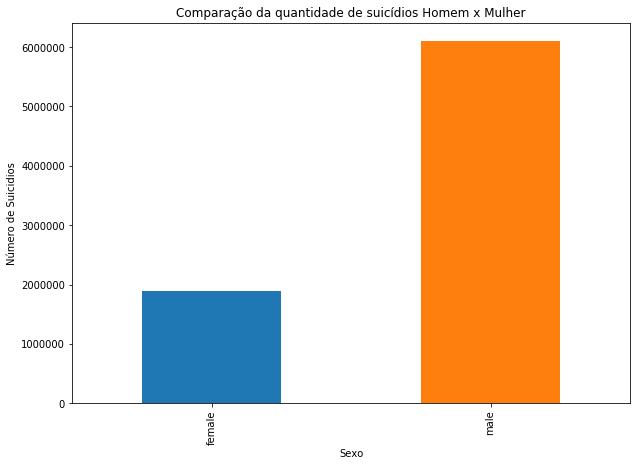

In [187]:
df_suicidios_limpo.groupby('sex')['suicides_no'].sum().plot.bar(figsize=(10,7),title = "Comparação da quantidade de suicídios Homem x Mulher")
plt.xlabel('Sexo')
plt.ylabel('Número de Suicidios')

Pelos dados válidos presentes no datasheet verificamos que os homens cometem mais suicídios que as mulheres. Isso analisando em um âmbito geral do mundo, pode ser que em algum país as mulheres cometem mais suicídio que os homens.

## Suicídios no mundo por idade e por ano

In [188]:
print(df_suicidios_limpo.groupby('age')['suicides_no'].sum())

age
15-24 years     975700.0
25-34 years    1360780.0
35-54 years    2887740.0
5-14 years       62320.0
55-74 years    1955150.0
75+ years       756777.0
Name: suicides_no, dtype: float64


Text(0,0.5,'Número de Suicidios')

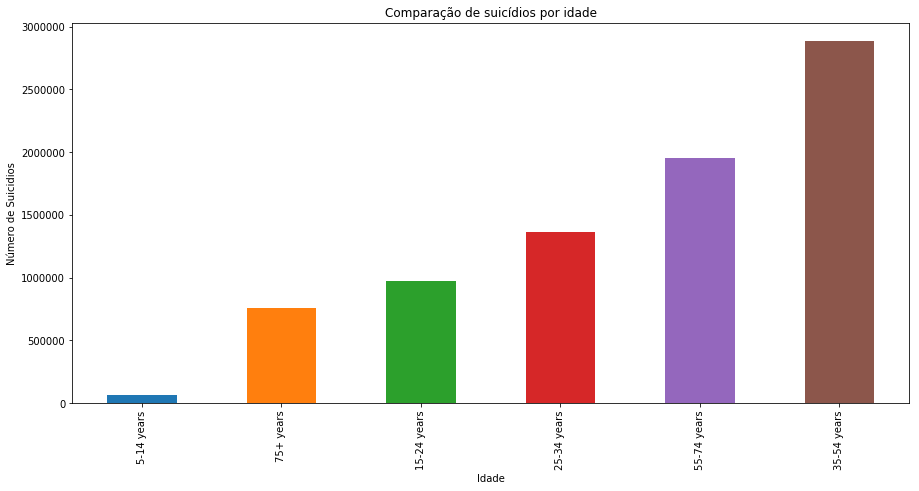

In [192]:
df_suicidios_limpo.groupby('age')['suicides_no'].sum().sort_values().plot.bar(figsize=(15,7),title = "Comparação de suicídios por idade")
plt.xlabel('Idade')
plt.ylabel('Número de Suicidios')

Agrupando os anos em períodos de décadas.

In [193]:
decadas = [1978,1988,1998,2008,2018]
df_suicidios_limpo['decadas'] = pd.cut(df_suicidios_limpo['year'], decadas)
df_suicidios_limpo.head()

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,year,sex,age,suicides_no,population,decadas
24,Albania,1987,female,15-24 years,14.0,289700.0,"(1978, 1988]"
25,Albania,1987,female,25-34 years,4.0,257200.0,"(1978, 1988]"
26,Albania,1987,female,35-54 years,6.0,278800.0,"(1978, 1988]"
27,Albania,1987,female,5-14 years,0.0,311000.0,"(1978, 1988]"
28,Albania,1987,female,55-74 years,0.0,144600.0,"(1978, 1988]"


In [195]:
print(df_suicidios_limpo.groupby('decadas')['suicides_no'].sum())

decadas
(1978, 1988]    1605042.0
(1988, 1998]    2271142.0
(1998, 2008]    2483115.0
(2008, 2018]    1639168.0
Name: suicides_no, dtype: float64


Text(0,0.5,'Número de Suicidios')

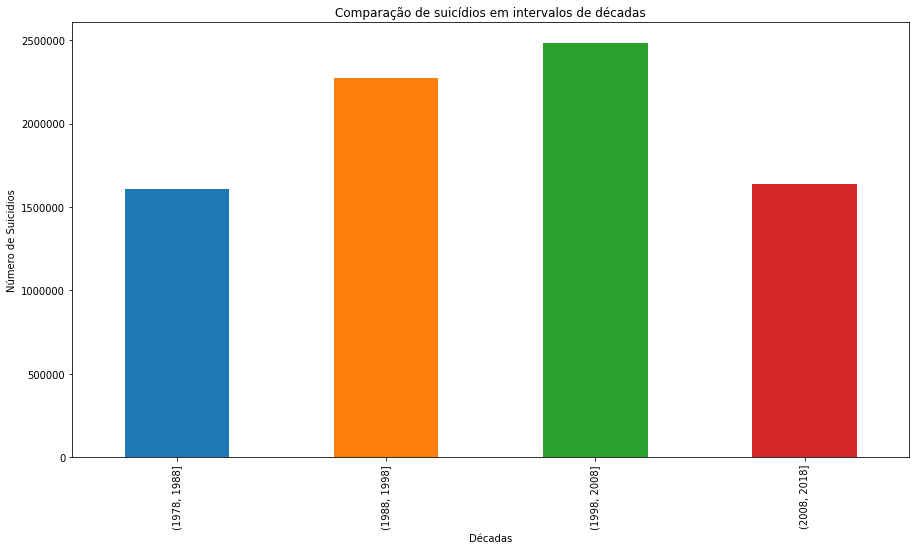

In [198]:
df_suicidios_limpo.groupby('decadas')['suicides_no'].sum().sort_index().plot.bar(figsize=(15,8),title = "Comparação de suicídios em intervalos de décadas")
plt.xlabel('Décadas')
plt.ylabel('Número de Suicidios')

Observando os gráficos chegamos a conclusão que a faixa etária que ocorre o maior indice de suicidios é entre 35 e 54 anos, e o período que ocorreu maior incidência de suicídios foi entre 1998 à 2008. Uma observação pertinente é que o indice de suicidios seguia um aumento considerado ao passar das décadas porém na passagem das décadas de 1998 à 2008 e de 2008 a 2018 ocorreu uma queda nas ocorrências de suicídio, o que não condiz com o que é visto na grande mídia mundial que alerta do alto indice de suicidio na década atual. Talvez essa queda se dê devido ao número de dados ausentes da análise por falta de dados.

Text(0,0.5,'Número de Suicidios')

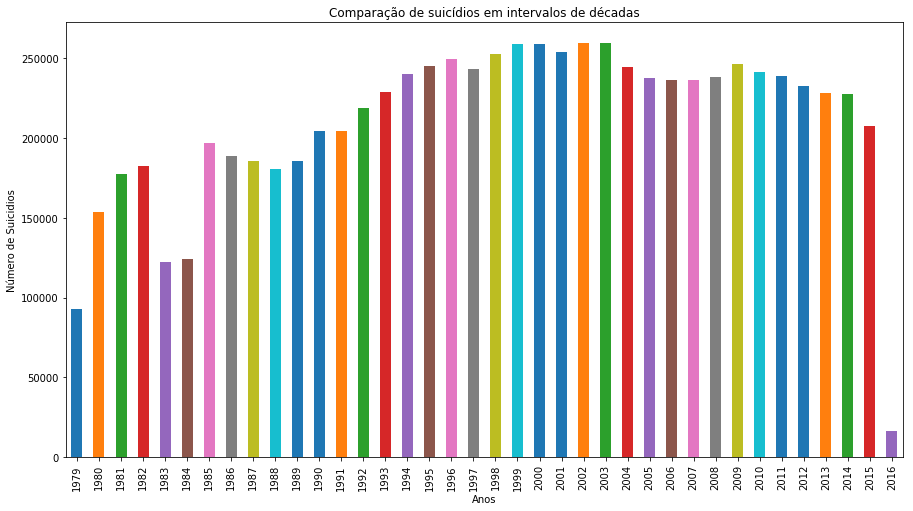

In [202]:
df_suicidios_limpo.groupby('year')['suicides_no'].sum().sort_index().plot.bar(figsize=(15,8),title = "Comparação de suicídios em intervalos de décadas")
plt.xlabel('Anos')
plt.ylabel('Número de Suicidios')

Com esse gráfico de suicídios por anos percebemos que realmente os dados de 2016 à 2018 estão ausentes em grande parte ou até mesmo não existindo, o que faria total diferença no comparativo final. Entretanto podemos perceber que depois do ano de 1988 o número de suicídios foi tendo uma crescente e sofrendo uma oscilação baixa, o que nos leva a pensar que os gráficos de 2016, 2017 e 2018 seguirão essa tendencia.

## Comparativo de suicídios no Brasil por idade e ano

In [242]:
br_df = df_suicidios_limpo[df_suicidios_limpo.country=='Brazil']

Text(0,0.5,'Número de Suicídios')

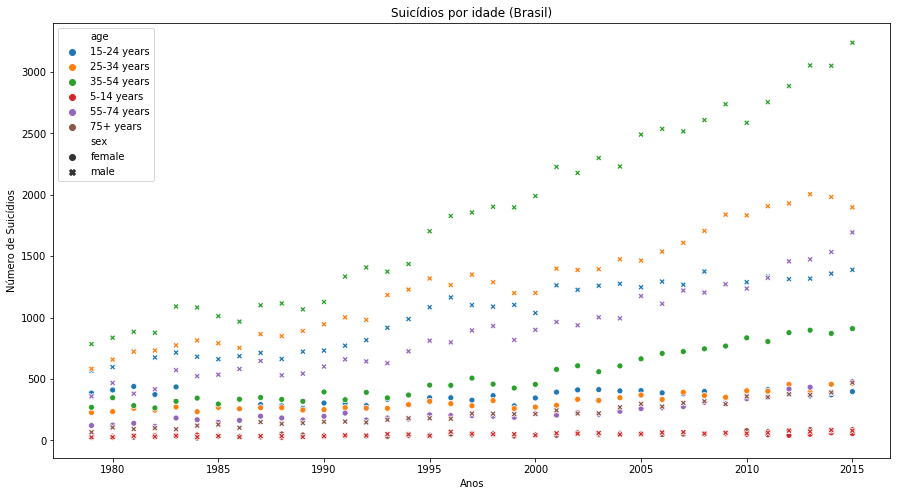

In [229]:
pais = "Brasil"
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title( 'Suicídios por idade ({})'.format(pais))
p = sns.scatterplot(x="year", y="suicides_no", data=br_df,hue='age',style='sex')
plt.xlabel('Anos')
plt.ylabel('Número de Suicídios')

In [234]:
br_df[br_df.year==2015]

,country,year,sex,age,suicides_no,population,decadas
6636,Brazil,2015,female,15-24 years,397.0,17047218.0,"(2008, 2018]"
6637,Brazil,2015,female,25-34 years,466.0,17546090.0,"(2008, 2018]"
6638,Brazil,2015,female,35-54 years,910.0,28461855.0,"(2008, 2018]"
6639,Brazil,2015,female,5-14 years,56.0,15430579.0,"(2008, 2018]"
6640,Brazil,2015,female,55-74 years,479.0,15122216.0,"(2008, 2018]"
6641,Brazil,2015,female,75+ years,89.0,3802086.0,"(2008, 2018]"
6642,Brazil,2015,male,15-24 years,1389.0,17569045.0,"(2008, 2018]"
6643,Brazil,2015,male,25-34 years,1897.0,17625976.0,"(2008, 2018]"
6644,Brazil,2015,male,35-54 years,3238.0,26989063.0,"(2008, 2018]"
6645,Brazil,2015,male,5-14 years,79.0,16057040.0,"(2008, 2018]"



Observando esse gráfico percebe-se que no Brasil segue a tendência mundial de ocorrer um aumento no indice de suicidios a partir do período de 1998, ficando também claro o aumento exorbitante do indice de suicidios de pessoas na faixa dos 35 à 54 anos de idade, sendo bem discrepante das demais faixas etárias. E pela tabela em seguida da para fazer uma verificação mais precisa do gráfico no ano de 2015


In [251]:
decada_br_mulher = br_df[br_df.sex=='female'].groupby('decadas')['suicides_no'].sum()
decada_br_homem = br_df[br_df.sex=='male'].groupby('decadas')['suicides_no'].sum()
br_genero = br_df.groupby('sex').suicides_no.sum()
br_decadas = br_df.groupby('decadas').suicides_no.sum()

In [245]:
print(decada_br_mulher)
print(decada_br_mulher)
br_genero

decadas
(1978, 1988]    11458.0
(1988, 1998]    12793.0
(1998, 2008]    16559.0
(2008, 2018]    15141.0
Name: suicides_no, dtype: float64
decadas
(1978, 1988]    11458.0
(1988, 1998]    12793.0
(1998, 2008]    16559.0
(2008, 2018]    15141.0
Name: suicides_no, dtype: float64


sex
female     55951.0
male      194873.0
Name: suicides_no, dtype: float64

Text(0,0.5,'Número de suicídeos')

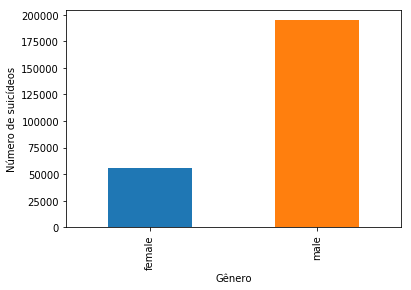

In [249]:
br_genero.plot.bar()
plt.xlabel('Gênero')
plt.ylabel('Número de suicídeos')

In [252]:
br_decadas

decadas
(1978, 1988]    41848.0
(1988, 1998]    58080.0
(1998, 2008]    79697.0
(2008, 2018]    71199.0
Name: suicides_no, dtype: float64

Text(0,0.5,'Número de suicídeos')

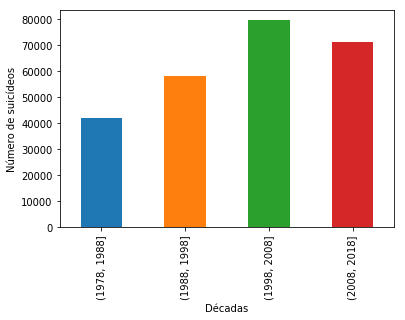

In [253]:
br_decadas.plot.bar()
plt.xlabel('Décadas')
plt.ylabel('Número de suicídeos')

Analisando os dois últimos gráficos, observamos que no Brasil o maior índice de pessoas que se suicidam são homens, e que seguindo o padrão mundial a década de 1998 a 2008 é o período que ocorreu maior índice de suicídios no país. Porém a decada de 2008 a 2018 está bem próxima da anterior em números de suicídio, apesar de possuir a maior ausência de dados, isso indica que quando os dados forem atualizados provavelmente a decada de 2008 à 2018 passará a década anterior no indice de suicidios.

In [300]:
periodo = ['1978-1988','1988-1998', '1998-2008', '2008-2018']

In [301]:
br_df_porcentagem = br_df.groupby('decadas')['suicides_no'].sum()
mulher_porcentagem = (decada_br_mulher * 100)/br_df_porcentagem
homem_porcentagem = (decada_br_homem*100)/br_df_porcentagem


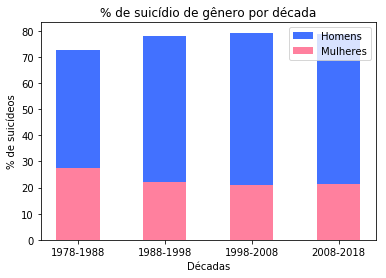

In [323]:
df_mulher = pd.DataFrame(decada_br_mulher)
df_homen = pd.DataFrame(decada_br_homem)
bar1 = mulher_porcentagem
bar2 = homem_porcentagem
eixoX = np.array(periodo)
plt.bar(eixoX, bar2, color=(0.2588,0.4433,1.0), width=.5, label='Homens')
plt.bar(eixoX, bar1, color=(1.0,0.5,0.62), width=.5, label='Mulheres')
plt.ylabel('% de suicídeos')
plt.xlabel('Décadas')
plt.title('% de suicídio de gênero por década')
plt.legend()
plt.show()

In [322]:
homem_porcentagem

decadas
(1978, 1988]    72.619958
(1988, 1998]    77.973485
(1998, 2008]    79.222555
(2008, 2018]    78.734252
Name: suicides_no, dtype: float64

In [303]:
mulher_porcentagem

decadas
(1978, 1988]    27.380042
(1988, 1998]    22.026515
(1998, 2008]    20.777445
(2008, 2018]    21.265748
Name: suicides_no, dtype: float64

Observando o último gráfico, percebemos que a proporção de suicídios de acordo com o gênero no Brasil tem se mantido nas últimas décadas, sendo aproximadamente 22% mulheres e 78% homens que cometem o suicídio. Procurando explicações em alguns estudos, isso se deve ao fato de que as alternativas de suicídio escolhidas pelos homens serem mais letais (tiro na cabeça, enforcamento, saltar de um prédio), já as alternativas utilizadas pelas mulheres não são tão letais (overdose de sonífero, overdose de remédio para dor, cortar os pulsos) o que acaba fazendo com que exista um tempo para que o socorro chegue ou alguém ajude.
